In [14]:
#carregando os bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [15]:
#ler os dados
dados = pd.read_csv(r'C:\Users\Samsung\Desktop\Startups+in+2021+end.csv')

#tamanho do dataset
dados.shape

(936, 8)

In [16]:
#primeiros registros
dados.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [17]:
#verificar os tipos de dados
dados.dtypes

Unnamed: 0           int64
Company             object
Valuation ($B)      object
Date Joined         object
Country             object
City                object
Industry            object
Select Investors    object
dtype: object

In [18]:
#verificar se há valores nulos
dados.isnull().sum()

Unnamed: 0           0
Company              0
Valuation ($B)       0
Date Joined          0
Country              0
City                15
Industry             0
Select Investors     1
dtype: int64

In [19]:
#remover linhas com valores nulos
dados.dropna(inplace=True)

In [20]:
#verificar se há valores nulos
dados.isnull().sum()

Unnamed: 0          0
Company             0
Valuation ($B)      0
Date Joined         0
Country             0
City                0
Industry            0
Select Investors    0
dtype: int64

In [29]:
#renomear
dados.rename(columns={'Unnamed: 0':'Id', 'Company':'Empresa', 'Valuation ($B)': 'Valor ($)', 'Date Joined': 'Data de Entrada', 'Country': 'País', 'Industry': 'Setor', 'Select Investors': 'Investidores'}, inplace=True)

In [30]:
dados.head()

,Id,Empresa,Valor ($),Data de Entrada,País,City,Setor,Investidores
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [31]:
#verificar o tipo de dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 920 entries, 0 to 935
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Id               920 non-null    int64 
 1   Empresa          920 non-null    object
 2   Valor ($)        920 non-null    object
 3   Data de Entrada  920 non-null    object
 4   País             920 non-null    object
 5   City             920 non-null    object
 6   Setor            920 non-null    object
 7   Investidores     920 non-null    object
dtypes: int64(1), object(7)
memory usage: 64.7+ KB


In [33]:
#mudar o tipo de dados da coluna Data de Entrada
dados['Data de Entrada'] = pd.to_datetime(dados['Data de Entrada'])

#remover a string $ da coluna Valor ($)
dados['Valor ($)'] = dados['Valor ($)'].str.replace('$', '')

#mudar o tipo de dados da coluna Valor ($)
dados['Valor ($)'] = dados['Valor ($)'].astype(float)

In [34]:
dados.head()

,Id,Empresa,Valor ($),Data de Entrada,País,City,Setor,Investidores
0,0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [35]:
#verificar o tipo de dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 920 entries, 0 to 935
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Id               920 non-null    int64         
 1   Empresa          920 non-null    object        
 2   Valor ($)        920 non-null    float64       
 3   Data de Entrada  920 non-null    datetime64[ns]
 4   País             920 non-null    object        
 5   City             920 non-null    object        
 6   Setor            920 non-null    object        
 7   Investidores     920 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 64.7+ KB


In [39]:
#verificar os dados unicos
dados.nunique()

Id                 920
Empresa            919
Valor ($)          192
Data de Entrada    587
País                46
City               239
Setor               17
Investidores       905
dtype: int64

In [40]:
#verificar os dados unicos da coluna Setor
dados['Setor'].unique()

array(['Artificial intelligence', 'Other', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics', 'Edtech',
       'E-commerce & direct-to-consumer', 'Hardware', 'Health',
       'Consumer & retail', 'Auto & transportation', 'Finttech',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Artificial Intelligence'], dtype=object)

In [45]:
#contabilizar os dados unicos da coluna Setor
dados['País'].value_counts()

United States           477
China                   168
India                    51
United Kingdom           37
Germany                  23
Israel                   21
France                   19
Canada                   15
Brazil                   15
South Korea              11
Australia                 6
Japan                     6
Mexico                    5
Netherlands               5
Spain                     4
Indonesia                 4
Sweden                    4
Switzerland               4
Hong Kong                 3
Norway                    3
Ireland                   3
United Arab Emirates      3
Denmark                   2
Philippines               2
Finland                   2
Thailand                  2
South Africa              2
Austria                   2
Belgium                   2
Colombia                  2
Turkey                    2
Czech Republic            1
Malaysia                  1
Croatia                   1
Chile                     1
United States,      

In [52]:
#contabilizar os dados unicos da coluna Setor em percentual
analise = round(dados['País'].value_counts(normalize=True)*100,1)
analise

United States           51.8
China                   18.3
India                    5.5
United Kingdom           4.0
Germany                  2.5
Israel                   2.3
France                   2.1
Canada                   1.6
Brazil                   1.6
South Korea              1.2
Australia                0.7
Japan                    0.7
Mexico                   0.5
Netherlands              0.5
Spain                    0.4
Indonesia                0.4
Sweden                   0.4
Switzerland              0.4
Hong Kong                0.3
Norway                   0.3
Ireland                  0.3
United Arab Emirates     0.3
Denmark                  0.2
Philippines              0.2
Finland                  0.2
Thailand                 0.2
South Africa             0.2
Austria                  0.2
Belgium                  0.2
Colombia                 0.2
Turkey                   0.2
Czech Republic           0.1
Malaysia                 0.1
Croatia                  0.1
Chile         

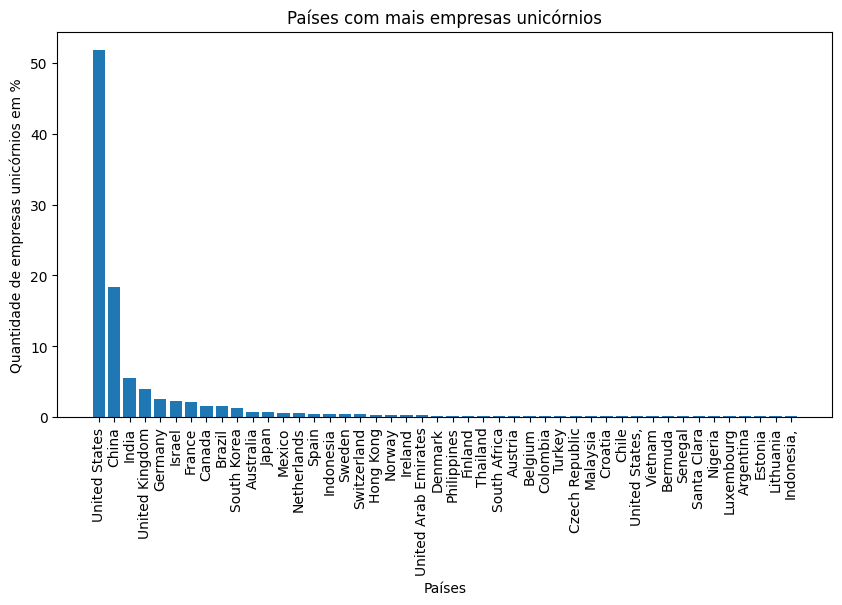

In [55]:
#criar um grafico de barras da analise com o matplotlib
plt.figure(figsize=(10,5))
plt.bar(analise.index, analise.values)
plt.title('Países com mais empresas unicórnios')
plt.xlabel('Países')
plt.ylabel('Quantidade de empresas unicórnios em %')
plt.xticks(rotation=90)
plt.show()







In [56]:
#verificar o tipo de dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 920 entries, 0 to 935
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Id               920 non-null    int64         
 1   Empresa          920 non-null    object        
 2   Valor ($)        920 non-null    float64       
 3   Data de Entrada  920 non-null    datetime64[ns]
 4   País             920 non-null    object        
 5   City             920 non-null    object        
 6   Setor            920 non-null    object        
 7   Investidores     920 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 64.7+ KB


In [57]:
#criar duas colunas com o ano e o mês da coluna Data de Entrada
dados['Ano'] = dados['Data de Entrada'].dt.year
dados['Mês'] = dados['Data de Entrada'].dt.month

In [58]:
dados.head()

,Id,Empresa,Valor ($),Data de Entrada,País,City,Setor,Investidores,Ano,Mês
0,0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2017,4
1,1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012,12
2,2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2014,1
3,3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2011,12
4,4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",2018,1


In [70]:
#criar um novo dataframe com os dados agrupados por pais, ano, mes e Empresa
dados2 = dados.groupby(['País', 'Ano', 'Mês', 'Empresa']).sum().reset_index()
dados2


,País,Ano,Mês,Empresa,Id,Valor ($)
0,Argentina,2021,8,Uala,298,2.45
1,Australia,2018,1,Canva,4,40.00
2,Australia,2019,3,Airwallex,117,5.50
3,Australia,2021,5,SafetyCulture,467,1.60
4,Australia,2021,7,Culture Amp,509,1.50
...,...,...,...,...,...,...
915,United States,2021,12,Panther Labs,556,1.40
916,United States,2021,12,ReliaQuest,934,1.00
917,United States,2021,12,YipitData,931,1.00
918,"United States,",2021,9,TrialSpark,899,1.00


In [67]:
#selecionar apenas os dados do Brasil
dados_bra = dados2[dados2['País'] == 'Brazil']
dados_bra

,País,Ano,Mês,Empresa,Id,Valor ($)
12,Brazil,2018,3,Nubank,8,30.00
13,Brazil,2018,7,Movile,744,1.00
14,Brazil,2018,11,iFood,758,1.00
15,Brazil,2019,6,Loggi,385,2.00
16,Brazil,2019,9,QuintoAndar,111,5.10
17,Brazil,2019,10,EBANX,776,1.00
18,Brazil,2019,12,Wildlife Studios,233,3.00
19,Brazil,2020,1,Loft,264,2.90
20,Brazil,2020,12,C6 Bank,112,5.05
21,Brazil,2020,12,Creditas,430,1.75


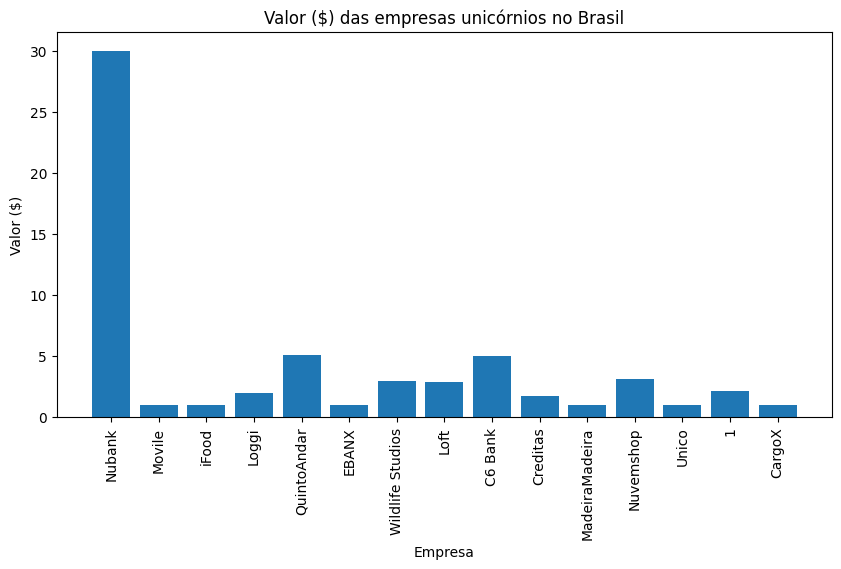

In [72]:
#plotar um grafico de barras com o valor ($) e a Empresa
plt.figure(figsize=(10,5))
plt.bar(dados_bra['Empresa'], dados_bra['Valor ($)'])
plt.title('Valor ($) das empresas unicórnios no Brasil')
plt.xlabel('Empresa')
plt.ylabel('Valor ($)')
plt.xticks(rotation=90)
plt.show()
